## Second step

In [6]:
opt_bids = [3.9416202240277745 , 3.0,  4.0]
opt_price = 7

### Gaussian process optimizer

In [7]:
import numpy as np
from matplotlib import pyplot as plt 
from learners.gp_learner import GP_Learner
from environment import Environment
from tqdm import tqdm
import warnings
warnings.filterwarnings("ignore")

bids = np.array([1.0, 1.0, 1.0])
price = 4.5      #Initial Price
T = 365

env = Environment()
gp_learner = GP_Learner()
regrets = [] 
sols = []

for t in tqdm(range(T)):
    outcome = sum(env.round(bids, price))
    x = np.append(bids,price)
    gp_learner.fit(x, outcome)

    bids, price = gp_learner.optimize()
    
    sols.append((bids ,price))
    regrets.append(sum(env.round(opt_bids, opt_price, noise = False)) - outcome)

100%|██████████| 365/365 [03:20<00:00,  1.82it/s]


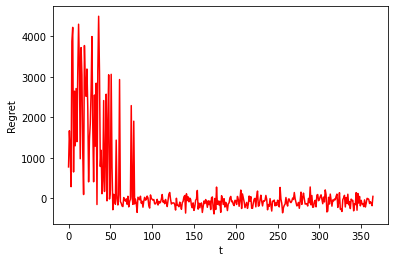

In [8]:
import matplotlib.pyplot as plt 
X = np.arange(0,365)
plt.figure(0)
plt.xlabel("t")
plt.ylabel("Regret")
plt.plot(X, regrets , 'r')

plt.show()

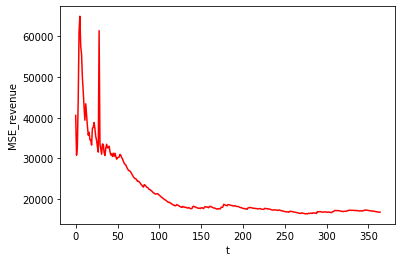

In [9]:
import matplotlib.pyplot as plt 
X = np.arange(0,365)
plt.figure(0)
plt.xlabel("t")
plt.ylabel("MSE_revenue")
plt.plot(X, gp_learner.errors , 'r')

plt.show()

In [10]:
gp_learner.opt_res

array([4., 4., 3., 6.])

In [11]:
regrets[-10:]

[-219.10793206518701,
 -121.85509221614711,
 -5.102554641449842,
 -11.608706759111556,
 -27.77935532381025,
 -131.60966432936402,
 -87.65300805576089,
 -123.39073581341427,
 -186.58836539035792,
 43.853243905447016]